<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 2</center></b><h2>
<h3><b><center>Sistemas Jerárquicos de N-cuerpos</center></b><h3>
<h5><center><b>Asignada</b>: 29 de Agosto de 2023</center><h5>
<h5><center><b>Entrega</b>: 12 de Septiembre de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>: 1000567825
<br/>
<b>Última actualización</b>: 2023-10-09
<hr/>

Repositorio de los codigos del curso:

https://github.com/andromedalactea/celestial_mechanics.git

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner a prueba la idea de que es posible simular un  sistema de N-cuerpos jerarquicos usando un *árbol* de sistemas de 2 cuerpos.

En particular compararemos la predicción de las posiciones que para un sistema múltiple de estrellas nos da la simulación con un sistema jerárquico y el mismo resultado pero calculado como si el sistema fuera un sistema de N cuerpos completo.

**Procedimiento**:

El sistema que simularemos es el de un sistema binario formado por dos estrellas "s" y "e".  Alrededor de la estrella "e" gira un planeta "p", a cuyo alrededor, a su vez, gira una luna "L".  Los datos de los cuerpos, dados en unidades canónicas, en las que $U_M = 80 M_{ Jup}$, $U_L = 0.01$ au, son.

- Masas: s = 1, e = 0.5, L = 0.001, p = 0.01.

- Condiciones iniciales (las posiciones están dadas respecto al cuerpo más masivo de cada subsistema):

   - Sistema p-L:
     - Posición inicial de p : r = [0,0,0]
     - Velocidad inicial de p: v = [0,0,0]
     - Posición inicial de L: r = [0.03,0,0]
     - Velocidad inicial de L: v = [0,0.4,0.1]

   - Sistema e-pL (baricentro de p y L):
     - Posición inicial de e : r = [0,0,0]
     - Velocidad inicial de e: v = [0,0,0]
     - Posición inicial de pL: r = [0,0.4,0]
     - Velocidad inicial de pL: v = [0.9,0,0.2]
     
  - Sistema s-epL (baricentro e y pL):
     - Posición inicial de s : r = [0,0,0]
     - Velocidad inicial de s: v = [0,0,0]
     - Posición inicial de epL: r = [2,3,0]
     - Velocidad inicial de epL: v = [-0.2,0.7,0]



Una vez definidas las condiciones iniciales:

1. Dibujar el árbol del sistema jerárquico como lo hicimos en clase.

2. Simular usando `ncuerpos_solucion` cada subsistema por separado y obtener el vector y la velocidad relativa como función del tiempo de cada subsistema. Para el tiempo total de simulación encuentre el período orbital de cada subsistema ¿cuánto es?. El tiempo de la simulación será igual al período más largo.

3. Suponiendo que el centro de masa de todo el sistema está en reposo en el origen, calcular a partir la solución al problema relativo de cada subsistema, la posición de cada cuerpo en el tiempo.

4. Haga gráficos de las posiciones y una animación que muestre la trayectoria de las partículas.

5. Tomando las posiciones iniciales calculadas en 3, use otra vez `ncuerpos_solucion` para encontrar las posiciones y velocidades de todas las partículas respecto del centro de masa. Haga un gráfico de la solución obtenida y cálcule con el obtenido en 4. ¿Se ven parecidas?

6. Haga gráficos de las componentes x, y, z de la posición de cada partícula del sistema a lo largo del tiempo, calculadas con la aproximación jerárquica (punto 3) y con la solución al sistema completo (punto 5). Un gráfico por cuerpo. Comente su resultado.

7. Haga gráficos de la energía cinética total, la energía potencial total y la energía mecánica total como función del tiempo usando los resultados en 3. El gráfico debe expresarse en unidades más convencionales: en el eje x el tiempo en días,  en el eje y la energía en Joules. ¿Qué observa?

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos solicitados en cada punto.

- Datos mínimos:
  - Números solicitados en cada punto.

- Gráficos opcionales:
  - Animación mostrando el movimiento de una de las partículas, predicho con la aproximación jerarquica y con la integración precisa.

  - Gráfico de la energía cinética, potencial y total para la simulación de N-cuerpos (punto 5).

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

In [23]:
!pip install -q pymcel
!pip install -q celluloid
!pip install -q astropy


' !pip install -q pymcel\n!pip install -q celluloid\n!pip install -q astropy\n'

In [24]:
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import HTML
from celluloid import Camera
from astropy import constants
import pandas as pd

## Solución

### 1. Dibujar el árbol del sistema jerárquico como lo hicimos en clase.

A continuación se realizara el diagrama de arbol que describe nuestro sistema:

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAasAAADbCAYAAADTRL4YAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAABM5SURBVHhe7d1PTxTLGsfxh/sqMJFEErduXAmJiYfEF6BEEnGjOcuzM2cH4h9gd8LOpcG7ABPJyAswUW9OIqzYsDXBBBN9F9zn110FxTgDDPOvpvv7Sep2d80w914H5jfV9XT12JEzAAAy9p+wBQAgW4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVgO688zbmbS60uA/0EGEFoDe2QpMbYQv0CGEFoHd2vB15e1YcAT1DWAHojQfebpW7QK8RVgCAi1keMxvztrxabot9Daf7j7ACgFH3btZsbrPcxhAZ8/0f4bHYp+f0wtJi2HHXJ8NOfxFWAFAFW4/Mvv1tdnTk7at3fDCb8IBK+/ScnoyE7psd6jW9PRwPff01duTCPgB0TqXr8940Z/VeHX309q3Zy5fhoOLW183u3AkH59DoSe/BYcPsatlVnLJbWvFAWQgdTn37G/4+6cmXULymb1958D2bKvsGhLAC0J12YbXrLX6e6ct8Wnyh67AuE2yTk2bfv4eDivv8ucOwunk6mNS37S0NphEOK04DAujOQ2/6ytscPmveDkPTvmgOxT/vulac1qp4u2hQ1QRhBaB/dEoqnpYShZV/DgOdIqwADA7XYeGSCCsAqKPd5FopzS9247g83rcaPfcBYQWgf/TB1acPL3Tjl9naXll+frjh+xe8/upZmE87VVyxE4o7vH/Ht+v9uUiYsALQH0+9TYQWCyzQHw8bHhZJJaCor7nqT2FT9B1481FQMac4E44v6Yf/7Cu9hrvl2/0uXusMhBWA/tD8lH82Fi0tspB+X4+FyiGsAADZI6wAoHa0nl8jzCl+CseXdNV/dkmv4XZ9e6M/awUSVgBQO+NmT2+WawdOeGitXXJFi8KU2eZeWQ2ouos+rWzBcksARkdcbomPrdphZAUAyB5hBQDIHmEFAMgeYQUAyB5hBaBzY960npy2sS17k7Sv2zXngICwAnA5qlDWvapUmKel5XRTPgVU2qfnsDYgeoCwAnA5r7zFZZRuh60CqrmPsEIPEFZA6oW39DRWHdtF7xp/PWwlBlR/Fi8AuCgYOOUPb1+8XSuO6umzt/P+/yvUNIrSLe0j9enuEPEGixpRacX1tK9bXBRcW4QVkIphpbsc1DmwzkNYYcA4DQgAyB5hBQDIHmEFYDDmvOlUobapd964HgvnIKwAdE5TRul8lagvnZtShWDsUxjdCMfaxnDShcTd3J0CtUFYAeg/FazcLXeLrY5F+yrUAM5BWAEYnl5VCaLyCCsAQPYIKwD9p5UtPpa7xZaVLtAhwgpA/+l03743VQMKp//QIVawAFKsYJE3VrCoLUZWAIDsEVYAgOwRVgCA7BFWAC5OK6mrSKJda15KCegRwgqD4R9ys/5hNuZtdbncqm1yF9lq2fJGYA3eu1n/d98st/GPa8z39feV9uk53VgOr7O8evKay7oHTP8RVhi4xaWw4ybjHWYxeg69qSgvNh2LAosvIYO39cjs299lpeTRV+/4YDbhYZL26Tm9CJelxbDjrg/mojlK1zEYGllNFH8+Zq/87+ZZ0ZsfStfPphDSDRVF4dT8ZcM/Gwu9vOFiKpauH8TFBSvu2gV/CTV60oLAh42T90SjoKUV/2NbCB1OffsbZu8vuXpw8ZrauX/6v2sACCsMRhJWG/4hN5/riIqwOttZYaWV1KfK3ZZB1gsxrOrg82ezO3fCwTmKsLp5OpjUt+0tDaZehdUrH6U9i2/2YBBWGAzCqhrSsGrHR87Wr5Hz27dm//tfOKi45887HFkRVkD3CKtqOC+s+jWiwtlqEFYUWAC4HAWTvupqJBUpzIA+IKwAdEen/B6Uu8WcFYGFPiCsMHSrY1ZesqFbnCd2/LjVdVjHz58z+xX6MGRrYSvrYYsRsNP9tVfRD3+dPl5zRVhhMK6aNY6suNwjna/69c5sz3/H1b+xfxJOmx5E08n1WJGer78vPf/nPbM3qkDD8Ok9jZ95et94XwbrYeP0fJWor3lu6pn/4cQ+hcvYdLl/Ufp5/fE1z1ftrppNPAoH/UFYYagOvpnN3i73Zzx8DhRW3ib9m/rXdC4kGH9otsC9kPLk782p04Gi1Sx8FPzbqhYaRXO6cLh+THrw6OLhXpgxO9wI+/1BWCE//i196ryKMv+g+2vb7E+Ca7D0vvgX66K1eo/ee4uPa3R1I+xrG0dbCq4Wo2YM2K0eVvP18rXaIKwwevxDb+yp2Wv/YBwPXciQyv/vlrvFVscaTWl+q8WoGTgLYYWhmrxu1vi33P/kI6Vz1wr0D7vZj/5lnaAaTXp/z3uPgRYIKwyV5qBuzpfVfY17Z1ws7KOp2XdmO+tmH5bK56upD0D1sYIFRoOH1apv+l5cwQoWvaM5Kh8FF9dhqaBCpwLj+6fjJ94YZeGCGFlhNPiHHFWAI0bv1743VQMK7x+6wMgKSDGyArLEyAoAkD3CCgCQPcIKAJA9wgoAkD3CCgCQPcIKAJA9wgoAkD3CCoOhNf3GzDa1bFJYKul4uaTwWOxrdcNFAPVGWGGgHk2Z/X1kxf3bdL+qD1oXcOJ03yM/7t/9RgGMIsIKA3V/8+S+fFPh9hErnkzNfcVNGAEgIKwwUDcnw45c9fDyzbm3BQFQe4QVACB7hBUAIHuEFQAge4QVACB7hBWythqvv9KdZROrc2a/wn7q+PltHgcwmggrDMZVs8ZR091+Q998Wg3oj+t6K/X9eme2t1keb+yHi4XDBcSL5bNP0fN1gZae//Oe2RvdVh1AJRBWyNbBNw+m2+X+jIePrr365e21h9FK2X3K+ENufQ9UFWGFkTLuYTQe9tvyQPtr2+xPgguojLEjF/Zxji9fzF6+DAc19fy52Z074aDPdpZ9NPXk5JTgm8mTkZPmrP583yK4dv2Xes3sZ6vHLuIPb/4+24G3a+oAkAPCqgMvXhBW6+tmjx+Hgz5TQP3l28ZDs00PJ/MQivNbLcNK81n+v6/xLBxfBmEFZImw6kAMK40uBvWBnZtrA/4AV3Wfiim0pqBCK0rDKo7AJj2oppfKx6X5Zy6EsAKyRFh1IIbVIEcXOJ/Cynw0FRfD7QphBWSJAguMvKleBRWAbBFWAIDsEVYAgOwRVgCA7BFWAIDsEVYAgOwRVgCA7BFWAIDsEVYAgOwRVgCA7BFWAIDsDTWstKp2vAW5FiblduQAgFbyGFltmS16K9y45H2IkL3jLydt2qxuSw8ALWRzGnBlx0zrvx91cy8ijLQP8wQWgNbyCKsH3IK8Vvz9/qkvJkn7uVk+9GGb08AAfkeBBbIwPhl2tspbSQFAirBCFnY+hh0fdcXcAoCIsMLg+ejpSlNxRbwd/cpTCmwA/I6wQh7CPNYCc5cAWsg2rFbjt+7l0BHoeqw4AZ+WQq/uhs5EfA0qzDKTFFishC7mqgCcZahhNf4wVIO9P33qRyG0t1k+trFvtvnDO73NevAslk8pvNk++dCztdNVZHoNC+Xws/4830WGFg7N7of9aS4IB9BGliOrg28eMLfL/Zl7fuxB9cvbaw+e42/ibqEp5FIKwnhKSd/YmbTP1FV/X0PZukZXb1qMkAFgZOasxj142gXTjk4VtpqYD6OxPQ88Ju3zpS8WGw/K/cUpRsEAfjfyBRabc2af7raZmPdv7Q0fjb323VZzWsjH/FpyOjDMU7abt9SXk+LUcJPj53M6EaicLMNq8rqHzL/l/qdtP/bQaaUYUfmHXKug0mMxoHRaEcPXbo6yEL5YFI8/K+ccf5u3dPpyEsvcU+kc5U8fSXM6EaiWLMNKH2o358tvyQ3/4JlvFVb+4fWPf2g9mgjfpr3p9FH81j2lNQanyv5p36UkerS0mrfUez7pX06+vir7U+kcJYDqyfY04EL4lt3wD6HUcVFF+k08NM+mQhyJxddgcdyK8Pd1qtUXl5QH2l8+GmetSaBaRn7OqplGVDG0UDO7PpJ+avb6jCpRAKOpcmGFarjovOUxH1HNfvRRNEEFVBJhhSxdaN5SfDSlFUp21s0+LJ3MX7JqyYDo33kubP3f/bhpjjHt03MuKv6MCqjiPgUztUdYIVvt5i11qjcNr5uTZV86f9n8M+gj3eVbFbf+7140mfCW9uk5Cp9OpFWf542sUXmEFUbbLaoAs/AkbCVWa6aFTerbL3cvTBeKx7AjrGqPsAJa0fpc8RRU3dp3b51Kw+S6t7AiSVeehi3gxo5c2Mc5Xrwwe/nSbH3d7PHj0Ilqeevtv94u84FdFZ+9XSt3z6V5qXlv6aeI+ra9vS+OSjoFqJFV2teOAlN04SSjZgSEVQcIK6AJYYUB4TQgACB7Qw2r4uaJc/4FSlv/NhWblksqHot9LEwKALU2/JHVltn0NzsuOdb9qrTe35W0z59zpdOyVwB50mlC/xJatE6un4o/08k1W6iMLE4DbiRlrzOh7PVrUvZa9O0zugKyo+vZ0vkqUV/z3JT+nmOf5rP0M2pr6mgSH0vnqxRwmsNS/z1vXCRcO1mEVbqUjpbZUdkrd/YFKuoiRRbNFIAUW9QaBRYAhkOn9ju9lkrLOGlkRnDVDmEFYPA073TXWyeho1N/CrfLjMww8ggrAIOlEZXmqjoJKo2oPnojqGqLsAIwOAodLVCrhW5jdd9FrHvTz8WfUcEFamX0wmrXf1f9l1VttakiaDW5Hku3t4/P03VbzVbDY9xKAhggFVPFar/YLkLVhOnPsKp+7Qw1rHTPIl1Hld7Zt+jzoX56A73i9g+hb3PNbOPQj73t+X4RTh5Gsx48i9oXP/7HN8V1Wv68hr6VJXTBscpg9fjsdlkRCwDI18iNrA68zejbmbfZcPzLw+m1B48uKC74Y4309gRNFIjxthL6ecrkASBvlZizGvfgaXcr882nHmrpvXaiMBrbu9f+ZwEAeah0gYXmpVR11PKW6Bp9+Wjste82z30BAPIycmGlU3afVDDhrRGOW9mcM5vxMGoVVCq+iAF1oFtvAwCyNnJhNf+0XOh2zNusj5pansLzIHqkBXJDxV9ctV0BpmIKFWyoqkOPTfsut0UHgLyN3mlAD5a4GnvzqGkhVhEmzyla7L9xMhJbiI+dUYgBAMhDpeesms17MFFMAQCjp1ZhBQAYTYQVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7hBUAIHuEFQAge4QVACB7Qw8r3WK+WBm9TZvVLegBALWW/cjqwzyBBQB1l09YPTD7md7Ww9vPzfKhD9vl/agAAPWU9chqPN58asvsIOwCAOon67Da+Rh2fNTV7vb1AIDqyyesfPR0pam4YnqpfGjlKTdNBIA6y7vAIsxjLdwKxwCAWsqywGIldDFXBQCQLEdWC4dm98P+9ByVgABQd3meBrxq9jqUrWt09WY37AMAainbOavxh2YbD8r9xSmznXLXVmMBxnLoCFaTEVi6KsZqi6CLr8HFxgAwGrIusJhfS04HejgphPZ8xKV5rY19s80f/oC3WQ+exfJphTfbJ/Nf5q+RnkbUayj59NisPy+GIAAgX0MPK42gFBxH71uUp181a4TQOXpmdvDNA+Z2+dDMPT/2oPrl7bU/flyU4RZavVag/75YXajiDa7fAoD8ZT2yuohxD552wbSjU4WtrtEKo7E9Dzyu3wKA/I18WLWzOWf26W6ba7TCiO2177aa0wIA5GWkwmryuofMv+X+p20/9tBppRhRrbUOKj0WA0qnFQEA+RupsNJ80835spKvcc9svlVY/TD7Z8ns0cRJRaCKKDTS0nbqmf6j7J/2XVbHAID8jdxpwIVQcNHw4EodF1WkRRmheTaZ3TgppoivoaINAED+Kjtn1Wzeg4liCgAYTbUJK/RXcSG2TrUmF2Sr6Vq49CJtPaeb5bPiBd2ryyevSZEMUH2EFXpny2z628npV137prnDK2mfbgWjApguLYbbx0i7QhsA1UFYoac2noQdN/Oq3H5N5gaLvv3uRleFZJX+loU2ACpl7MiFfZzjxQuzly/Nrl0rWx09f2525044SOhU35V5Dyb/bSoKWmKflr5KVhTRpQPTHlZpXyd0GlBLa63sUMkJ1Alh1YEvX8z++CMc1NT6utnjx+EgQVgB6CfCqkPfv4edmmo3oiSsAPQTYYWeIKwA9BMFFgCA7BFWGBqNvOK1UloKqxtaTqt4rR6UxQPID6cBMTS6u/OfOh24azZ78PsSWheW/LxOMx48oZwdqBpGVhiauJ7jLw+am93cBfPWSdAd7HORMFBFhBWGSiMhFWbM9KBYQsUXj26cFHgAqA7CCkOlW7boRPSnLtcMlGI1/btms+9CB4DKIKwwHD88VGJA+f5e0Xk5KtSIAaVTigCqhwILDE28Nks2DrsrilA14KMt39GagZe8hgtAvggrAED2OA0IAMgeYQUAyB5hBQDIHmEFAMgeYQUAyB5hBQDIHmEFAMgeYQUAyB5hBQDIHmEFAMgeYQUAyB5hBQDIHmEFAMgeYQUAyB5hBQDInNn/AQBr9IeMqliHAAAAAElFTkSuQmCC" />

Para nuestro sistema:

0 --> Representa la luna

1 --> Representa el planeta

2 --> Representa la estrella e

3 --> Representa la estrella s


### 2. Simular usando `ncuerpos_solucion` cada subsistema por separado y obtener el vector y la velocidad relativa como función del tiempo de cada subsistema. Para el tiempo total de simulación encuentre el período orbital de cada subsistema ¿cuánto es?. El tiempo de la simulación será igual al período más largo.

Para que el proceso sea más simple en cuestones de codigo más adelante, primero definamos los diccionarios con las caracteristicas de los subsistemas

In [25]:
#Definiedo los diccionarios:
#Sabiendo que las unidades son canonicas  Um=80Mjup , UL=0.01 au
#definiendo las masas
m0=0.001
m1=0.01
m2=0.5
m3=1

#Sistema p-L
sistema01=[
    {'m':m1,'r':[0,0,0],'v':[0,0,0]}, #caracteristicas del planeta 
    {'m':m0,'r':[0.03,0,0],'v':[0,0.4,0.1]} #carcateristicas de la luna   respecto al planeta 
    
]

#sistema e-pL
sistema01_2=[
    {'m':m2,'r':[0,0,0],'v':[0,0,0]}, #caracteristicas de la estrella e 
    {'m':m0+m1,'r':[0,0.4,0],'v':[0.9,0,0.2]} #carcateristicas del sistema pl, respecto a e
]

#Sistema s-epL
sistema012_3=[
    {'m':m3,'r':[0,0,0],'v':[0,0,0]}, #caracteristicas de la estrella s
    {'m':m0+m1+m2,'r':[2,3,0],'v':[-0.2,0.7,0]} #carcateristicas del sistema epl, respecto a s
]


Ahora simulemos cada sistema por separado, donde debemos tener en cuenta que el tiempo de integración va a estar en unidades canónicas UT

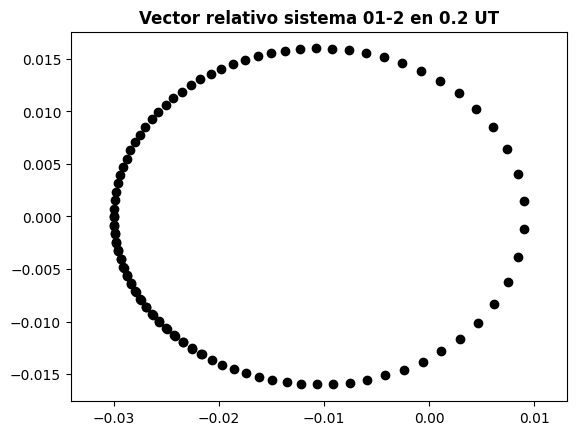

In [26]:
#Primero el sistema planeta-Luna
ts = np.linspace(0,0.2,100) #tiempo de la simulación en unidades canónincas
rs0_1,vs0_1,rps0_1,vps0_1,cuadraturas0_1 = pc.ncuerpos_solucion(sistema01,ts)

#veamos la posicion relativa de la luna respecto al planeta
r01 = rs0_1[0,:,:] - rs0_1[1,:,:]

#Ahora grafiquemos el vector relativo
plt.figure()
plt.plot(r01[:,0],r01[:,1],'ko')
plt.axis("equal")
plt.title(f'Vector relativo sistema 01-2 en {ts[-1]} UT',fontweight='bold')
plt.show()

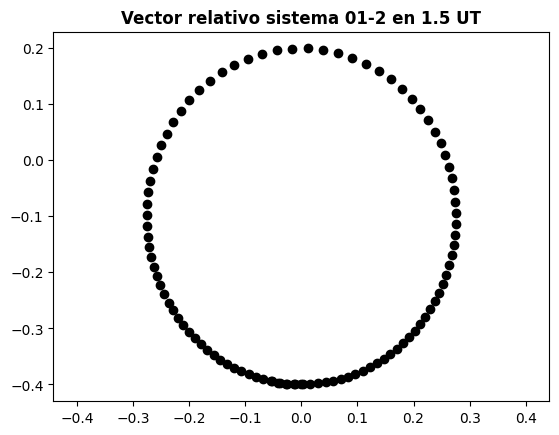

In [27]:
#Ahora para el sistema planeta-Luna  Estrella "e"
ts = np.linspace(0,1.5,100) #tiempo de la simulación en unidades canónincas
rs01_2,vs01_2,rps01_2,vps01_2,cuadraturas01_2 = pc.ncuerpos_solucion(sistema01_2,ts)

#veamos la posicion relativa de la luna respecto al planeta
r012 = rs01_2[0,:,:] - rs01_2[1,:,:]

#Ahora grafiquemos el vector relativo
plt.figure()
plt.plot(r012[:,0],r012[:,1],'ko')
plt.axis("equal")
plt.title(f'Vector relativo sistema 01-2 en {ts[-1]} UT',fontweight='bold')
plt.show()

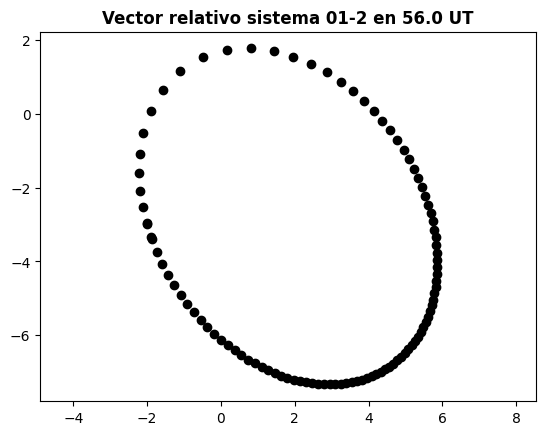

In [28]:
#Ahora para el sistema planeta-Luna-estrella("e") -- estrella ("s")
ts = np.linspace(0,56,100) #tiempo de la simulación en unidades canónincas
rs012_3,vs012_3,rps012_3,vps012_3,cuadraturas012_3 = pc.ncuerpos_solucion(sistema012_3,ts)

#veamos la posicion relativa de la luna respecto al planeta
r0123= rs012_3[0,:,:] - rs012_3[1,:,:]

#Ahora grafiquemos el vector relativo
plt.plot(r0123[:,0],r0123[:,1],'ko') 
plt.axis("equal")
plt.title(f'Vector relativo sistema 01-2 en {ts[-1]} UT',fontweight='bold')
plt.show()

56 UT es nuestro periodo más largo en el que se completa un ciclo entre los astros, así que este será el valor que usemos para las siguientes simulaciones

### 3. Suponiendo que el centro de masa de todo el sistema está en reposo en el origen, calcular a partir la solución al problema relativo de cada subsistema, la posición de cada cuerpo en el tiempo.

Primero hagamos nuestros calculo nuevamente, pero esta vez todos para un mismo tiempo de integración de 56 UT

In [29]:
ts = np.linspace(0,56,500) #tiempo de la simulación en unidades canónincas

#Primero el sistema planeta-Luna

rs0_1,vs0_1,rps0_1,vps0_1,cuadraturas0_1 = pc.ncuerpos_solucion(sistema01,ts)

#veamos la posicion relativa de la luna respecto al planeta
r01 = rs0_1[0,:,:] - rs0_1[1,:,:]
#para la velocidad
v01 = vs0_1[0,:,:] - vs0_1[1,:,:]

#Ahora para el sistema planeta-Luna  Estrella "e"

rs01_2,vs01_2,rps01_2,vps01_2,cuadraturas01_2 = pc.ncuerpos_solucion(sistema01_2,ts)

#veamos la posicion relativa de la luna respecto al planeta
r012 = rs01_2[0,:,:] - rs01_2[1,:,:]
#para la velocidad
v012 = vs01_2[0,:,:] - vs01_2[1,:,:]

#Ahora para el sistema planeta-Luna-estrella("e") -- estrella ("s")

rs012_3,vs012_3,rps012_3,vps012_3,cuadraturas012_3 = pc.ncuerpos_solucion(sistema012_3,ts)

#veamos la posicion relativa de la luna respecto al planeta
r0123= rs012_3[0,:,:] - rs012_3[1,:,:]
#para la velocidad
v0123 = vs012_3[0,:,:] - vs012_3[1,:,:]

Ahora si, veamos las posiciones de los astros, respecto al centro de masa ubicado en el origen

In [30]:
#Primero elegimos el centro de masa de todo el sistema en el origen 
R0123 = np.zeros((500,3))

#Haciedno la conversiónd de coordenadas de Jacobi al espacio normal

#encontrando las posiciones de la estrella s y la del baricentro de la estrella e. el planeta y la luna

#Para la estrella s, y el baricentro de 012

r3= R0123+ (m0+m1+m2)/(m0+m1+m2+m3)*r0123
R012= R0123- (m3)/(m0+m1+m2+m3)*r0123

#Para la velocidad
v3=  (m0+m1+m2)/(m0+m1+m2+m3)*v0123
vR012= -(m3)/(m0+m1+m2+m3)*v0123

#con este baricentro de 012, podemos encontrar la posición de la estrella e, y el baricentro de 01

r2=R012 + (m0+m1)/(m0+m1+m2)*r012
R01=R012 - (m2)/(m0+m1+m2)*r012

#Para la velocidad
v2=vR012 + (m0+m1)/(m0+m1+m2)*v012
vR01=vR012 - (m2)/(m0+m1+m2)*v012

#Para finalizar encontremos las posiciones del planeta y la estrella

r1=R01 + (m0)/(m0+m1)*r01
r0=R01 - (m1)/(m0+m1)*r01

#Para la velocidad
v1=vR01 + (m0)/(m0+m1)*v01
v0=vR01 - (m1)/(m0+m1)*v01


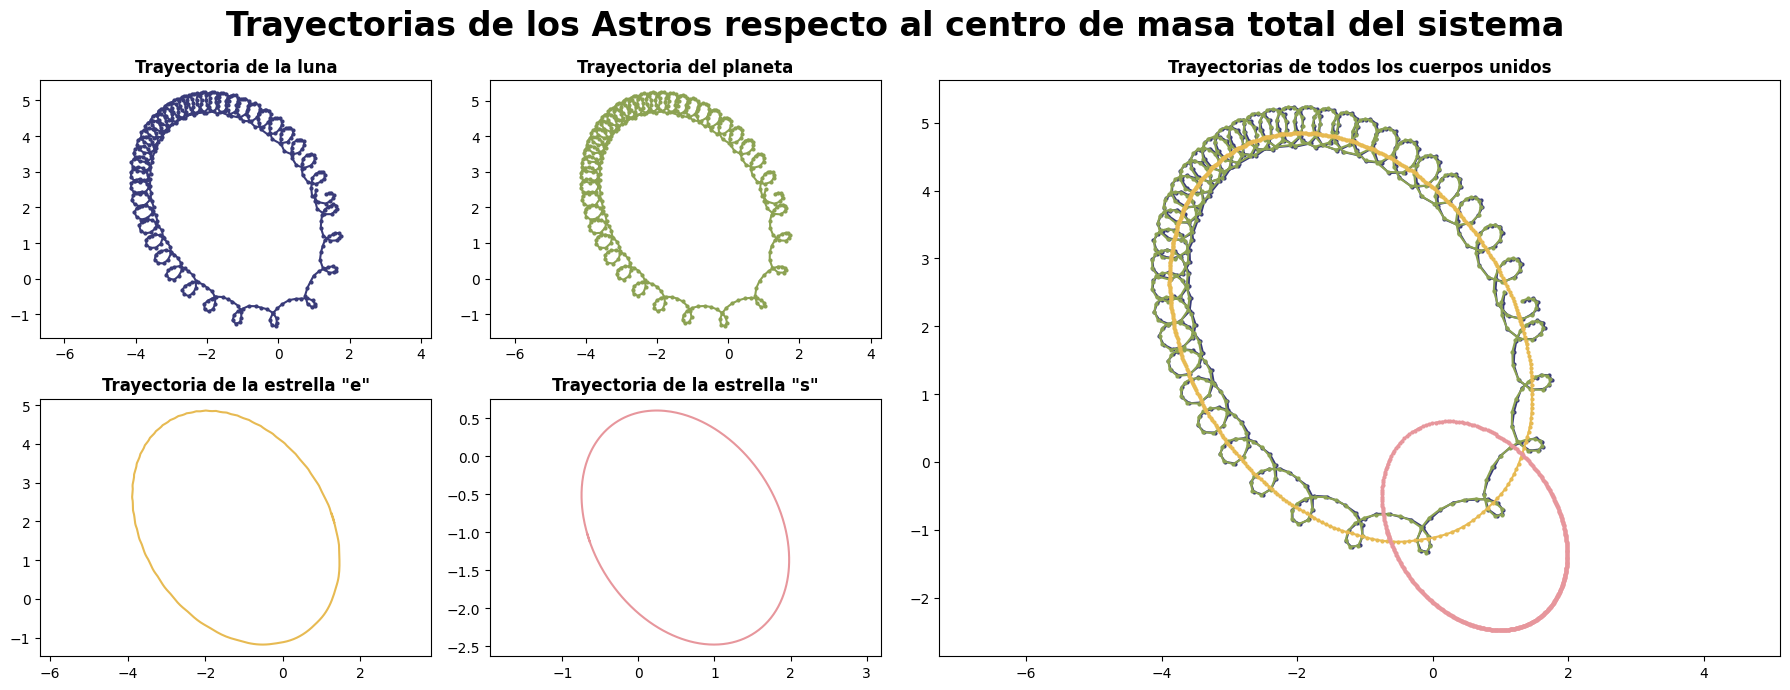

In [31]:
#Inicialización de la Figura y Configuraciones Generales
fig = plt.figure(figsize=(18, 7))
color_map = plt.get_cmap('tab20b', 5) #para los colores
gs = gridspec.GridSpec(2, 4)


#Defineido una función que cree los subplots con las mismas condiciones, para no tener que irlas cambiando por cada uno 
def create_subplot(position, data_list, title, marker=None, color_index=None):
    ax = plt.subplot(position)
    for i, data in enumerate(data_list):
        color = color_map(color_index if color_index is not None else i) #Esta linea permite que los colores coincidan
        ax.plot(data[:, 0], data[:, 1], marker=marker, linestyle=None, color=color,markersize=2, label=f'Datos {i+1}') #Haciendo el gráfico
    ax.set_title(title, fontweight='bold')
    ax.axis('equal')

# Creando los subplots para cada cuerpo individual
create_subplot(gs[0, 0], [r0], 'Trayectoria de la luna', marker='o',  color_index=0)
create_subplot(gs[0, 1], [r1], 'Trayectoria del planeta', marker='o',  color_index=1)
create_subplot(gs[1, 0], [r2], 'Trayectoria de la estrella "e"',  color_index=2)
create_subplot(gs[1, 1], [r3], 'Trayectoria de la estrella "s"',  color_index=3)

# Creando un subplot más grande con todas las trayectorias
big_subplot_position = gs[:, 2:4]
create_subplot(big_subplot_position, [r0, r1, r2, r3], 'Trayectorias de todos los cuerpos unidos', marker='o')

fig.suptitle('Trayectorias de los Astros respecto al centro de masa total del sistema', fontsize=24, fontweight='bold')
plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan
plt.show()


Haciendo la simulación de nuestro sistema

In [32]:
fig = plt.figure()  # Creando la figura

# Inicializar la cámara para capturar cada cuadro de la animación
c = Camera(fig)

# Establecer que los ejes X y Y tengan la misma escala
plt.axis('equal')
plt.title('Simulación de la trayectoria de los cuerpos \npor Coordendas de Jacobi', fontweight='bold')  # Poniendo el titulo a la simulación

# Bucle que recorre 10 iteraciones para crear la animación
for i in range(0,500,3):
    if i == 0:  # Solo añadir etiquetas en la primera iteración
        plt.plot(r0[i, 0], r0[i, 1], 'ko', label='Luna')  # Grafica de la posición de la luna
        plt.plot(r1[i, 0], r1[i, 1], 'bo', label='Planeta')  # Grafica de la posición del planeta
        plt.plot(r2[i, 0], r2[i, 1], 'yo', label='Estrella "e"')  # Grafica de la posición de la estrella "e"
        plt.plot(r3[i, 0], r3[i, 1], 'ro', label='Estrella "s"')  # Grafica de la posición de la estrella "s"
    else:  # Para las iteraciones restantes, no añadir etiquetas
        plt.plot(r0[i, 0], r0[i, 1], 'ko')  
        plt.plot(r1[i, 0], r1[i, 1], 'bo')  
        plt.plot(r2[i, 0], r2[i, 1], 'yo')  
        plt.plot(r3[i, 0], r3[i, 1], 'ro')  
        
    c.snap()  # Tomando capturas de cada instante de la gráfica

# Mostrar la leyenda solo una vez
plt.legend()

plt.close(fig)  # Para que no quede un gráfico en blanco para la salida
anim = c.animate(interval=100)  # 50 milisegundos entre cuadros para que la animación no sea muy larga 
HTML(anim.to_html5_video())

### 5. Tomando las posiciones iniciales calculadas en 3, use otra vez `ncuerpos_solucion` para encontrar las posiciones y velocidades de todas las partículas respecto del centro de masa. Haga un gráfico de la solución obtenida y cálcule con el obtenido en 4. ¿Se ven parecidas?

In [33]:
#ahora utilicemos n cuerpos solución para encontrar las posiciones de los cuerpos
ts = np.linspace(0,56,500) #tiempo de la simulación en unidades canónicas

#primero definamos el sistema de los 4 cuerpos, según las codiciones inciales obtenidas por el metodo de Coordendas de Jacobi:
sistema0123=[
    {'m':m0,'r':r0[0],'v':v0[0]},
    {'m':m1,'r':r1[0],'v':v1[0]},
    {'m':m2,'r':r2[0],'v':v2[0]},
    {'m':m3,'r':r3[0],'v':v3[0]}
]
#Solucionando el sistema
rs,vs,rps,vps,cuadraturas = pc.ncuerpos_solucion(sistema0123,ts)

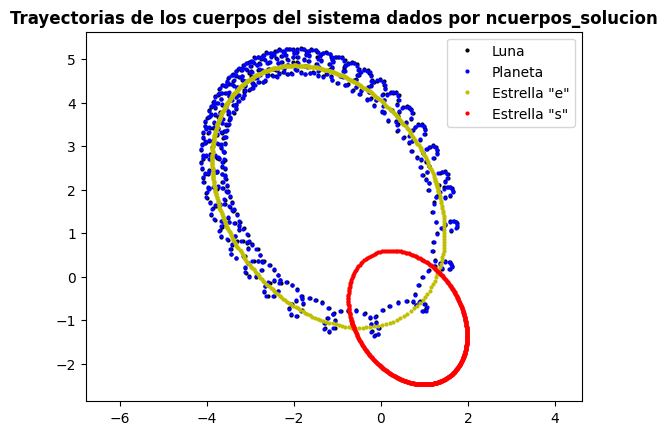

In [34]:
#Grafiquemos las posiciones ofrecidas por ncuerpos_solucion, para los cuerpos del sistema
plt.figure()
plt.plot(rs[0,:,0],rs[0,:,1],'ko',markersize=2,label='Luna') #Grafica de la trayectoria de la luna
plt.plot(rs[1,:,0],rs[1,:,1],'bo',markersize=2,label='Planeta') #Grafica de la trayectoria del planeta
plt.plot(rs[2,:,0],rs[2,:,1],'yo',markersize=2,label='Estrella "e"') #Grafica de la trayectoria de la estrella "e"
plt.plot(rs[3,:,0],rs[3,:,1],'ro',markersize=2,label='Estrella "s"') #Grafica de la trayectoria de la estrella "s"

#Cambiando ciertas propiedades del gráfico
plt.axis('equal')
plt.legend()
plt.title('Trayectorias de los cuerpos del sistema dados por ncuerpos_solucion',fontweight='bold')
plt.show()

In [35]:
# Haciendo la simulación
fig = plt.figure()  # creando la figura

# Inicializar la cámara para capturar cada cuadro de la animación
c = Camera(fig)

# Establecer que los ejes X y Y tengan la misma escala
plt.axis("equal")
plt.title('Simulación de la trayectoria de los cuerpos \npor ncuerpos_solución', fontweight='bold')  # Poniendo el titulo a la simulación

# Bucle que recorre 500 iteraciones para crear la animación
for i in range(0,500,3):
    if i == 0:  # Solo añadir etiquetas en la primera iteración
        plt.plot(rs[0, i, 0], rs[0, i, 1], 'ko',  label='Luna')  # Grafica de la trayectoria de la luna
        plt.plot(rs[1, i, 0], rs[1, i, 1], 'bo',  label='Planeta')  # Grafica de la trayectoria del planeta
        plt.plot(rs[2, i, 0], rs[2, i, 1], 'yo',  label='Estrella "e"')  # Grafica de la trayectoria de la estrella "e"
        plt.plot(rs[3, i, 0], rs[3, i, 1], 'ro',  label='Estrella "s"')  # Grafica de la trayectoria de la estrella "s"
    else:  # Para las iteraciones restantes, no añadir etiquetas
        plt.plot(rs[0, i, 0], rs[0, i, 1], 'ko', )  
        plt.plot(rs[1, i, 0], rs[1, i, 1], 'bo', )  
        plt.plot(rs[2, i, 0], rs[2, i, 1], 'yo', )  
        plt.plot(rs[3, i, 0], rs[3, i, 1], 'ro', )
  
    c.snap()  # Tomando capturas de cada instante de la gráfica

plt.legend()

plt.close(fig)  # Para que no quede un gráfico en blanco para la salida
anim = c.animate(interval=100)  # 50 milisegundos entre cuadros para que la animación no sea muy larga 
HTML(anim.to_html5_video())


Comprando ambas soluciones, la ofrecida por medio de las coordenadas de Jacobi y la ofrecida por ncuerpos_solucion, no se pueden apreciar diferencias en terminos de la trayectoria apreciable a la vista del gráfico ni la trayectoria de la simulación, ya tocaría entrar a un analisis númerico para hallar la diferencia entre ambas

### 6. Haga gráficos de las componentes x, y, z de la posición de cada partícula del sistema a lo largo del tiempo, calculadas con la aproximación jerárquica (punto 3) y con la solución al sistema completo (punto 5). Un gráfico por cuerpo. Comente su resultado.

In [36]:
ts = np.linspace(0,56,500) #tiempo de la simulación en unidades canóninca
# Definiendo el colormap
color_map = plt.get_cmap('tab20b', 9)

# Función para crear subplots con las misamas cracteristicas
def create_subplot(position,ax_list, data, title):
    ax = plt.subplot(3, 3, position)
    ax.plot(ts, data, color=color_map(position-1))
    ax.set_title(title, fontweight='bold') 
    ax.set_xlabel('Tiempo (UT)')
    ax.set_ylabel('Espacio (ua)')
    ax_list.append(ax)

#Coordendas equivalentes segun indice
dic_coordinates={'0':'X','1':'Y','2':'Z'}

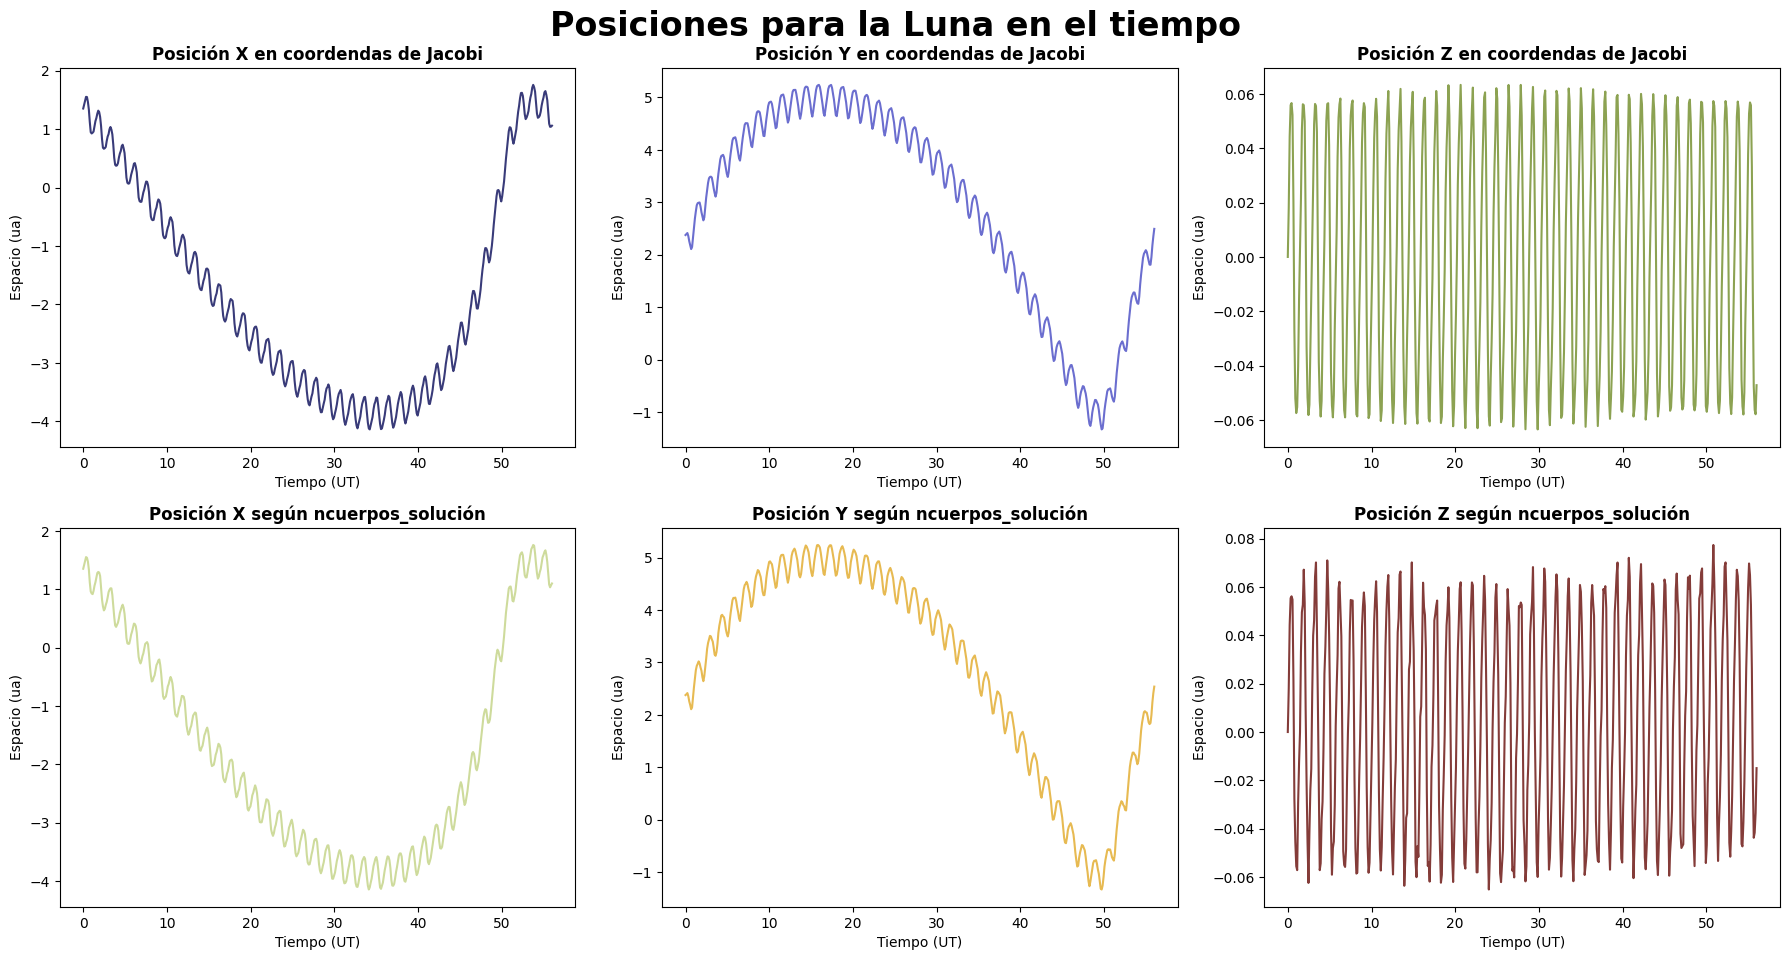

In [37]:
#haciendo los gráficos para la Luna

# Iniciando el entorno(Layout) para graficar
fig = plt.figure(figsize=(18, 14))

# Lista de ejes para manipulación posterior
ax_list = []
#resultados con las coordenadas de Jacobi
for i in range(0,3):
    create_subplot(i+1,ax_list,r0[:,i],f'Posición {dic_coordinates[str(i)]} en coordendas de Jacobi')

#Resultados dados por ncuerpos_solución
for i in range(0,3):
    create_subplot(i+4,ax_list,rs[0,:,i],f'Posición {dic_coordinates[str(i)]} según ncuerpos_solución')

fig.suptitle('Posiciones para la Luna en el tiempo', fontsize=24, fontweight='bold')

plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan
plt.show()

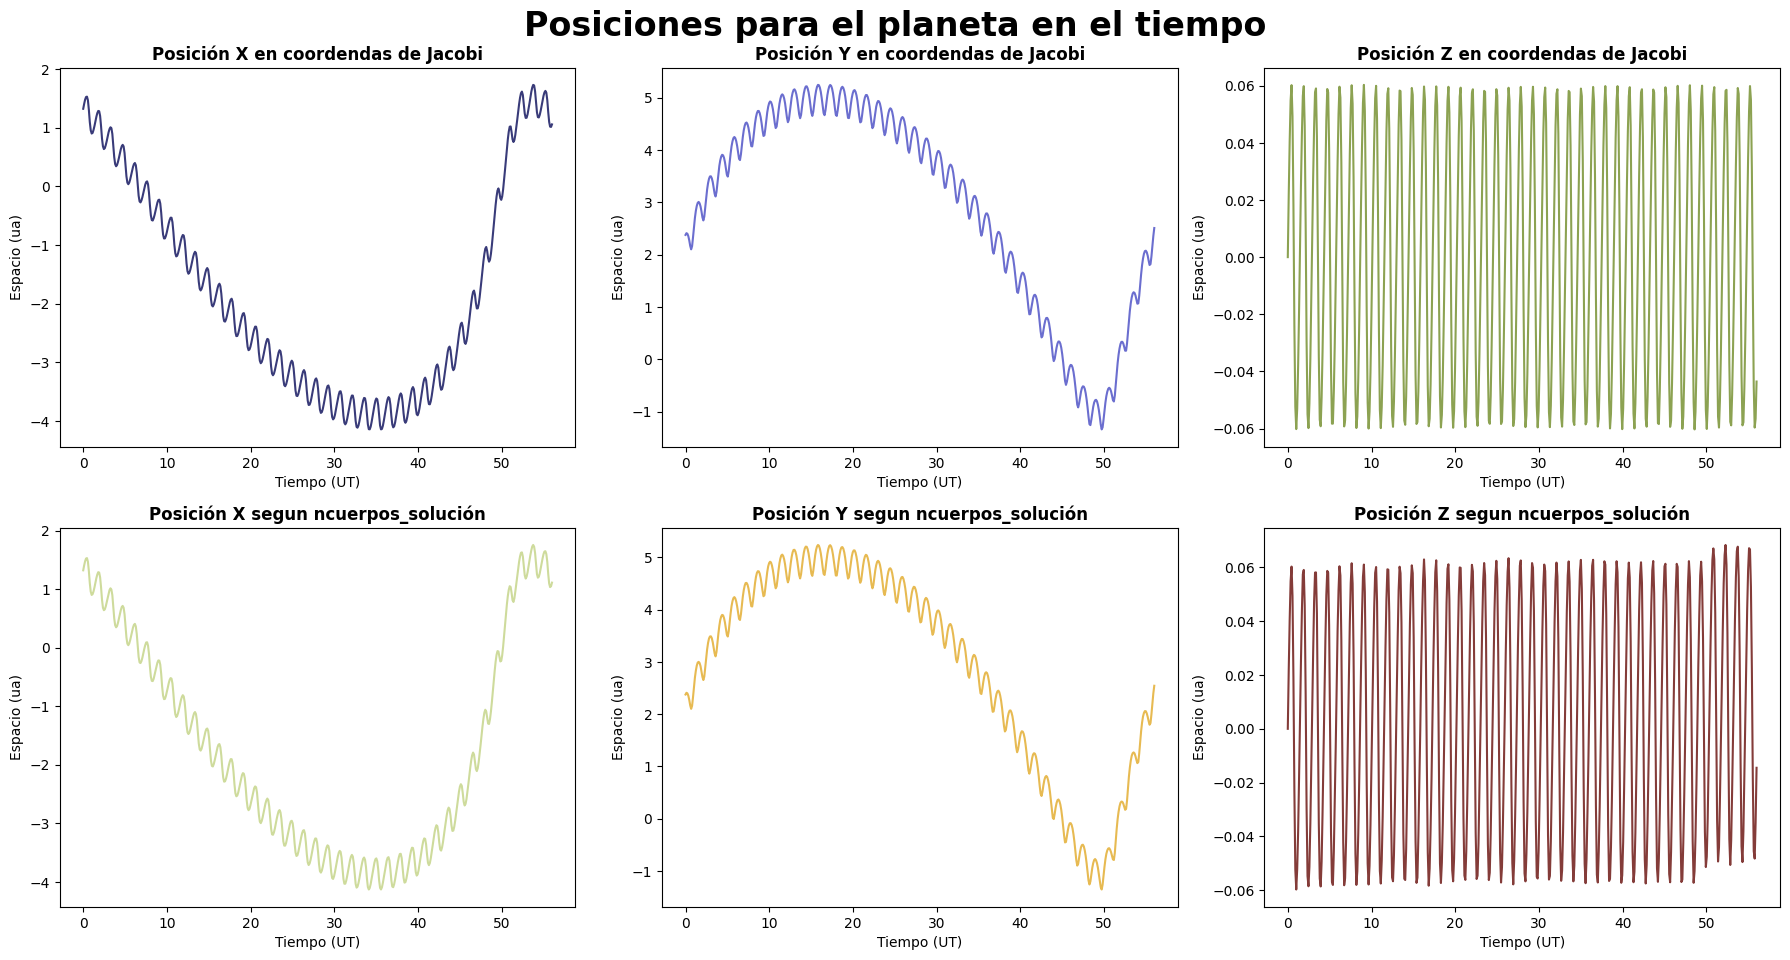

In [38]:
#Haciendo los gráfico para el Planeta 

# Iniciando el entorno(Layout) para graficar
fig = plt.figure(figsize=(18, 14))

# Lista de ejes para manipulación posterior
ax_list = []
#resultados con las coordenadas de Jacobi
for i in range(0,3):
    create_subplot(i+1,ax_list,r1[:,i],f'Posición {dic_coordinates[str(i)]} en coordendas de Jacobi')

#Resultados dados por ncuerpos_solución
for i in range(0,3):
    create_subplot(i+4,ax_list,rs[1,:,i],f'Posición {dic_coordinates[str(i)]} segun ncuerpos_solución')

fig.suptitle('Posiciones para el planeta en el tiempo', fontsize=24, fontweight='bold')

plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan
plt.show()

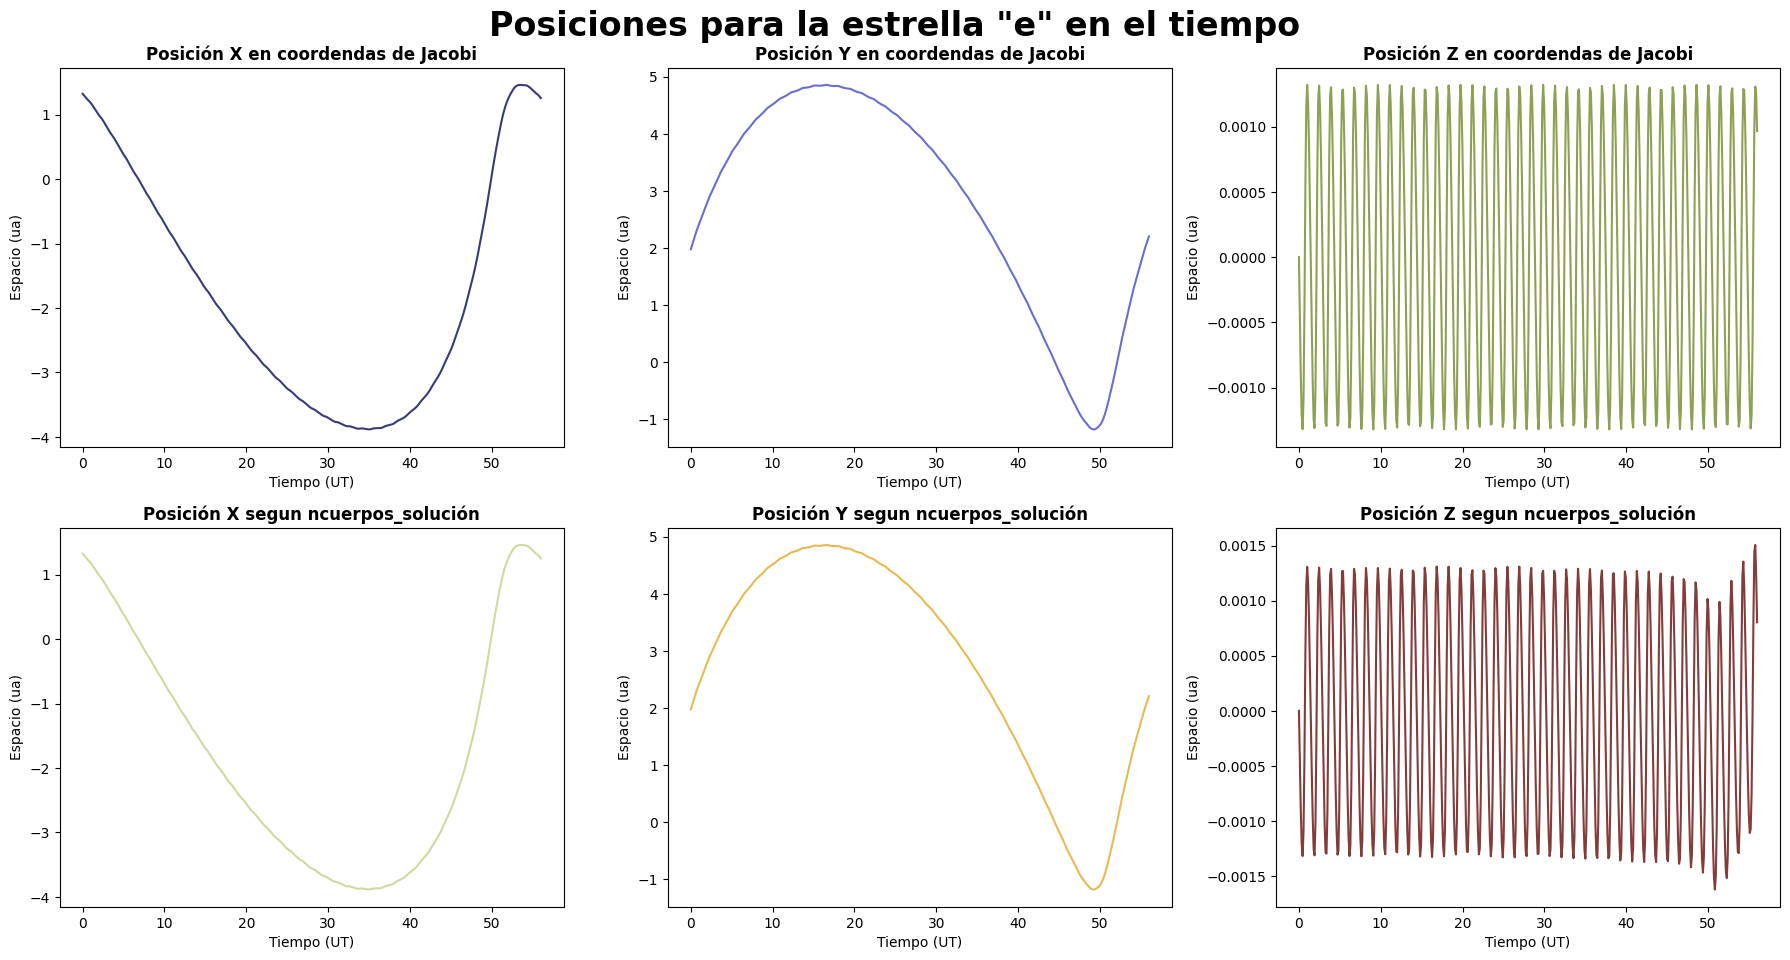

In [39]:
#Haciendo los gráficos para la estrella "e" 

# Iniciando el entorno(Layout) para graficar
fig = plt.figure(figsize=(18, 14))

# Lista de ejes para manipulación posterior
ax_list = []
#resultados con las coordenadas de Jacobi
for i in range(0,3):
    create_subplot(i+1,ax_list,r2[:,i],f'Posición {dic_coordinates[str(i)]} en coordendas de Jacobi')

#Resultados dados por ncuerpos_solución
for i in range(0,3):
    create_subplot(i+4,ax_list,rs[2,:,i],f'Posición {dic_coordinates[str(i)]} segun ncuerpos_solución')

fig.suptitle('Posiciones para la estrella "e" en el tiempo', fontsize=24, fontweight='bold')

plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan
plt.show()

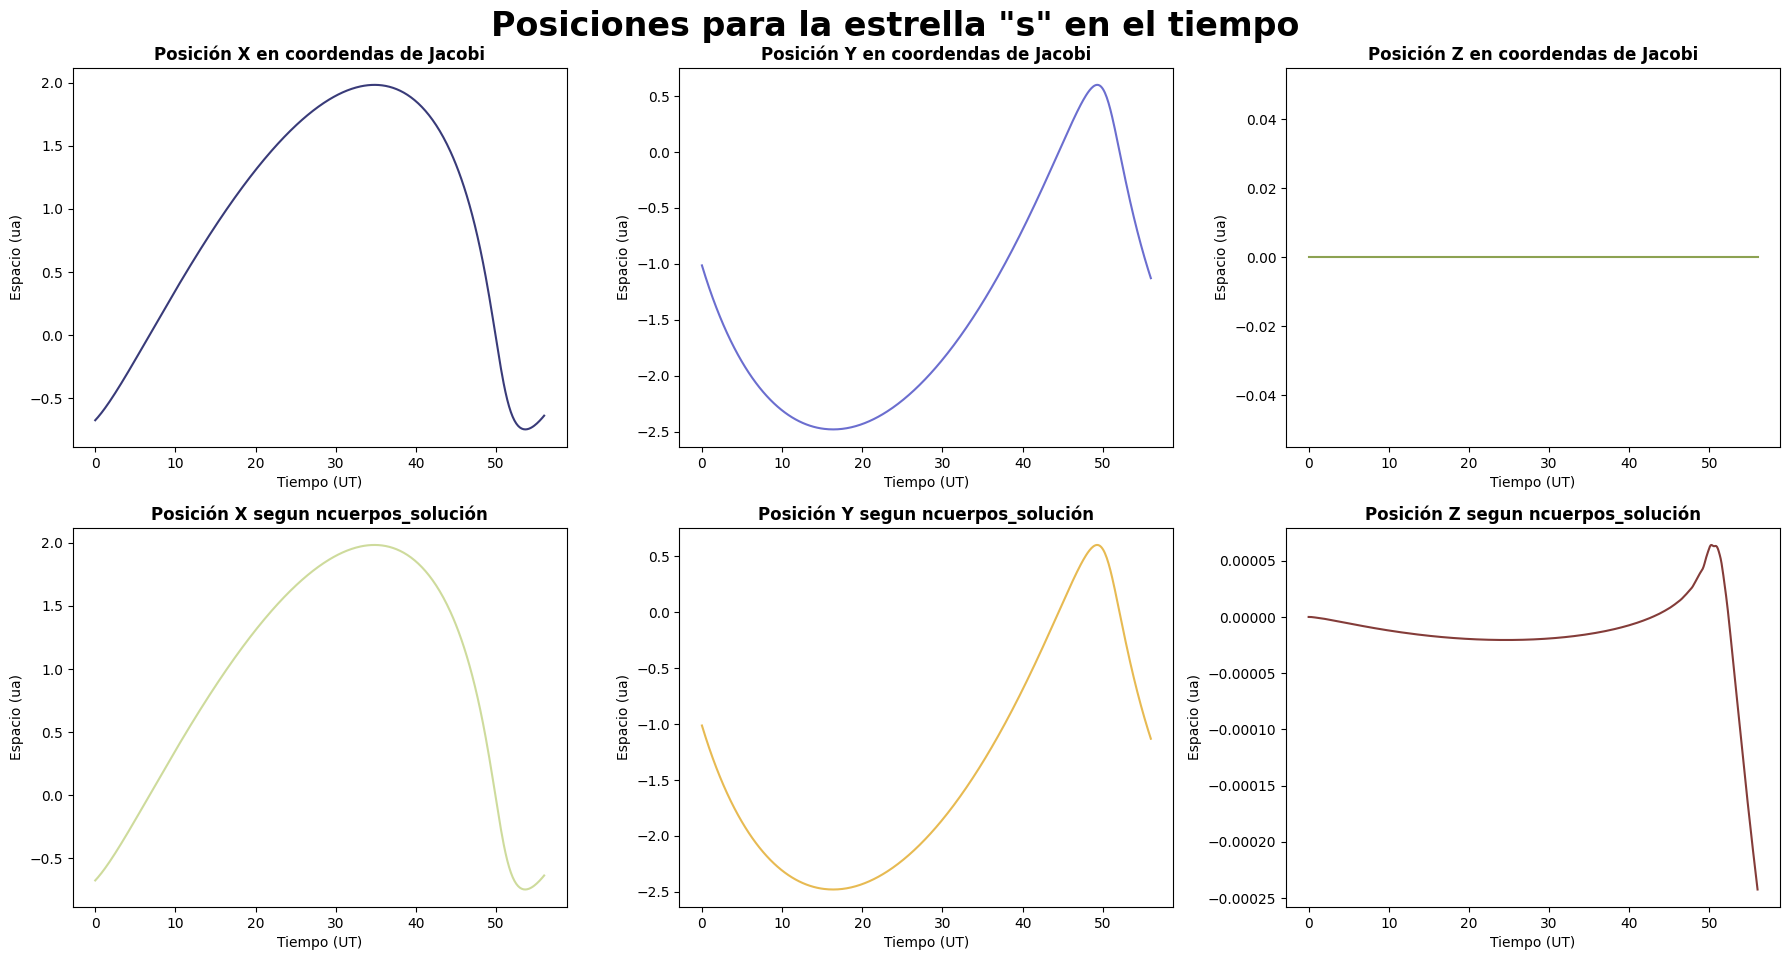

In [40]:
#Haciendo los gráficos para la estrella "s" 

# Iniciando el entorno(Layout) para graficar
fig = plt.figure(figsize=(18, 14))

# Lista de ejes para manipulación posterior
ax_list = []
#resultados con las coordenadas de Jacobi
for i in range(0,3):
    create_subplot(i+1,ax_list,r3[:,i],f'Posición {dic_coordinates[str(i)]} en coordendas de Jacobi')

#Resultados dados por ncuerpos_solución
for i in range(0,3):
    create_subplot(i+4,ax_list,rs[3,:,i],f'Posición {dic_coordinates[str(i)]} segun ncuerpos_solución')

fig.suptitle('Posiciones para la estrella "s" en el tiempo', fontsize=24, fontweight='bold')

plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan
plt.show()

Analizando los gráficos para todos los cuerpos, nos podemos dar de cuenta que:

1. apenas hay diferencias entre el gráfico del planeta y la luna, esto tiene sentido ya que enterminos de la distancia a la que se mueven las estrellas , la distancia entre el planeta y la luna es muy inferior así que practicamente son iguales

2. El movimiento de la estrella "e" es similar al de la luna y el planeta, sin embargo, estas dos ultimas al oscilar alrededor de la estrella "e" su movimiento se muestra oscilante, sin embargo el de la estrella "e" parece más lineal, sin embargo, esta también deberia de estar oscilando según la teoria por la presencia del planeta y  la luna cerca a esta.

3. El movimiento de ambas estrellas es contrario en todas las coordendas, y esto tiene sentido porque teniendo la animación los dos cuerpos siempre van en sentido contrario teniendo en cuenta todas las direcciones.

4. En donde se nota una mayor discrepancia entre ambas perpectivas (Coordendas de Jacobi y la solución númerica de ncuerpos_solución) es en la coordenada "z", en las otras dos coordendas son bastante similares

### 7. Haga gráficos de la energía cinética total, la energía potencial total y la energía mecánica total como función del tiempo usando los resultados en 3. El gráfico debe expresarse en unidades más convencionales: en el eje x el tiempo en días,  en el eje y la energía en Joules. ¿Qué observa?

Primero vamos a llevar las posiciones y velocidades a las unidades correctas, teniendo en cuenta que las unidades en las que hemos estado trabajando son $U_M = 80 M_{ Jup}$, $U_L = 0.01$ au, con esto podemos saber las unidades canónicas de tiempo en las que estamos trabajando


In [41]:
#calculando la unidad canónica de tiempo 
G_international=constants.G.value
UM=80*constants.M_jup.value #unidad canónica de masa
UL=0.01*constants.au.value #unidad canónica de espacio
UT=(UL**3/(G_international*UM))**0.5 #Unidad canonica de tiempo en segundos

#Comprobemos que en estas unidades G=1
G=G_international*(UM*UT**2)/UL**3
print(f'''El valor de G en unidades canónicas es:{G} 
y esto demuestra que la unidad canónica de tiempo esta bien calculada
y tiene un valor de {UT:.2f} s''')

El valor de G en unidades canónicas es:1.0 
y esto demuestra que la unidad canónica de tiempo esta bien calculada
y tiene un valor de 18175.15 s


Ahora hagamos la conversión de unidades de unidades canónicas a Joule $kg·m^2/s^2$ (la energía) y a días los tiempos canónicos

In [42]:
ts = np.linspace(0,56,500) #tiempo de la simulación en unidades canóninca

UTd=UT/86400 #Llevando las unidaes canonicas de segundos a días
#Las unidades canónicas de Masa y distancia ya estan en Kg y metros 

#Conversión de los tiempos "ts" a días:
ts=ts*UTd

#Conversión de las posiciones:
r0=r0*UL    #para la luna
r1=r1*UL    #para el planeta
r2=r2*UL    #para la estrella "e"
r3=r3*UL    #Para la estrella "s"

#convirtiendo las velocidades:
v0=v0*UL/UT   #para la luna
v1=v1*UL/UT   #para el planeta
v2=v2*UL/UT   #para la estrella "e"
v3=v3*UL/UT   #Para la estrella "s"

In [43]:
def calculate_energies(r, v, masses, G=G_international):
    num_tiempos, num_cuerpos, _ = r.shape
    
    # Inicializando arrays para las energías
    kinetic = np.zeros((num_tiempos, num_cuerpos))
    potential = np.zeros((num_tiempos, num_cuerpos))
    
    # Calculando la energía cinética
    for i in range(num_cuerpos):
        kinetic[:, i] = 0.5 * masses[i] * (np.linalg.norm(v[:, i, :], axis=1))**2
    
    # Calculando la energía potencial
    for t in range(num_tiempos):
        for i in range(num_cuerpos):
            for j in range(num_cuerpos):
                if i != j: #Quitando la posibilidad de agregar la energía potencial de un cuerpo con respecto a si mismo
                    rij = np.linalg.norm(r[t, i, :] - r[t, j, :])              
                    potential[t, i] += -G * masses[i] * masses[j] / rij
                    
    # Calcular energía mecánica
    mechanical = kinetic + potential
    
    return kinetic, potential, mechanical

# uniendo las posiciones y velocidades en un solo array cada una 
r = np.stack((r0, r1, r2, r3), axis=1)
v = np.stack((v0, v1, v2, v3), axis=1)
masses = np.array([.001*UM, .01*UM, 0.5*UM, UM])  # Agregando las masas de los astros

kinetic, potential, mechanical = calculate_energies(r, v, masses)


In [44]:
#Ahora para la energía total, solo es sumar la de todos los cuerpos
# Calcular la energía cinética total del sistema en cada tiempo
total_kinetic = np.sum(kinetic, axis=1)

# Calcular la energía potencial total del sistema en cada tiempo
total_potential = 0.5 * np.sum(potential, axis=1) #el 1/2 es para quitar las energías potenciales repetidas

# Calcular la energía mecánica total del sistema en cada tiempo
total_mechanical = total_kinetic + total_potential


ya con la información de las energías podemos graficarlas

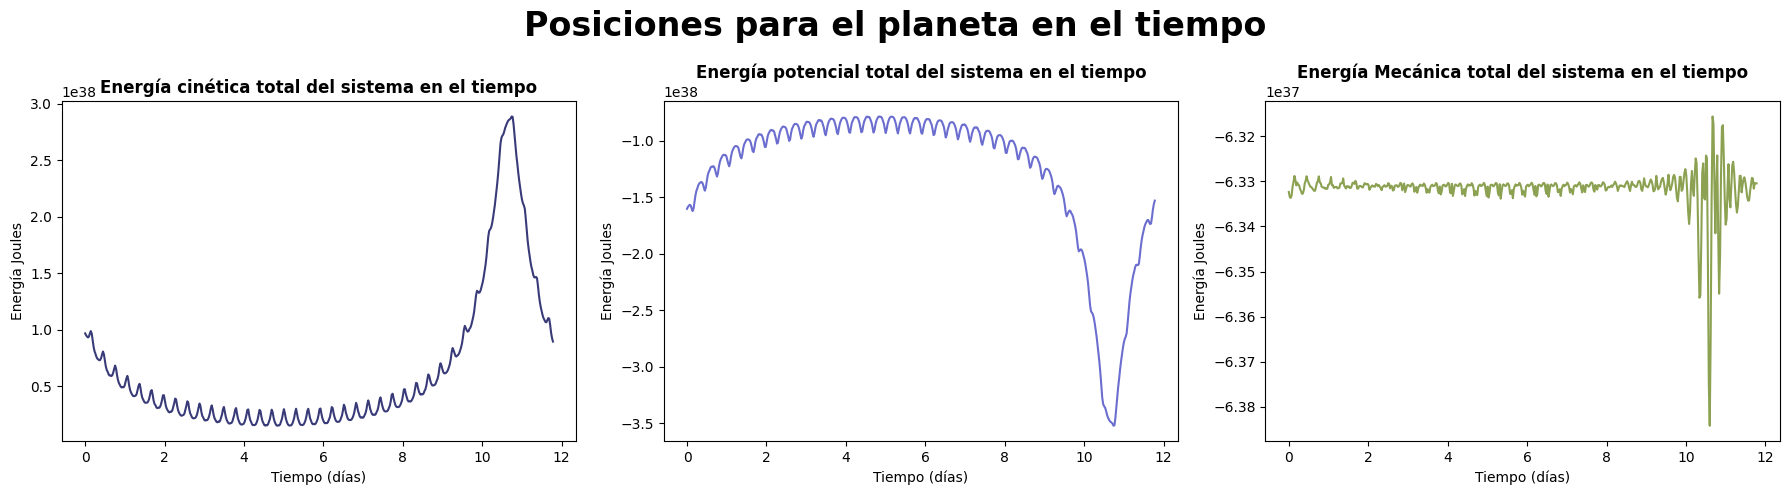

In [45]:
# Definiendo el colormap
color_map = plt.get_cmap('tab20b', 9)

# Función para crear subplots con el colormap
def create_subplot(position, data, title):
    ax = plt.subplot(1, 3, position)
    ax.plot(ts, data, color=color_map(position-1))
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Tiempo (días)')
    ax.set_ylabel('Energía Joules')
    ax_list.append(ax)

# Iniciando el entorno(Layout) para graficar
fig = plt.figure(figsize=(18, 5))

#Graficando la energía cinética
create_subplot(1,total_kinetic,'Energía cinética total del sistema en el tiempo')
create_subplot(2,total_potential,'Energía potencial total del sistema en el tiempo')
create_subplot(3,total_mechanical,'Energía Mecánica total del sistema en el tiempo')

fig.suptitle('Posiciones para el planeta en el tiempo', fontsize=24, fontweight='bold')

plt.tight_layout()  # Asegurar un buen layout para que los subplots no se superpongan
plt.show()

Teniendo en cuenta las gráficas y la simulación ofrecida para el sistema en el punto 3 podemos decir que:

1. los cuerpos se ven con una mayor velocidad a medida que se acercan,por tanto, su energía cinética aumenta y disminuye rapidamente ya que el tiempo que estan alejados es mayor del que estan relativamente juntas las estrellas, es por esto que para esta energía se mantienen durante más tiempo en menor cantidad

2. Para la energía potencialtenemos un comportamiento muy similar a la cinética, pero de manera negativa, cuando los cuerpos estan lejos (al principio de la simulación) la distancia entre ellos es mayor lo que hace que su energía potencial disminuya, pero a medida que se acercan esta distancia al disminuir  la energía aumenta (en sentido negativo), y este estado de energía alta es más corto que el de baja ya que los cuerpos cuando se acercan van más rapido

3. como la magnitud de la energía potenic


**Verificando si el sistema esta virializado**

In [46]:
#Obteniendo las energías promedio
average_kinetic=np.mean(total_kinetic) #Promedio de la energía cinética
average_potential=np.mean(total_potential) #Promedio de la energía Potencial
average_mechanical=np.mean(total_mechanical)#Promedio de la energía Mecánica

#armando un dataframe con esta información
dic={'average_energies':[average_kinetic,average_potential,average_mechanical,-2*average_kinetic]}
df=pd.DataFrame(dic,index=['EcT J','UT J','ET J','-2EcT J'])
df

,average_energies
EcT J,6.368986e+37
UT J,-1.270058e+38
ET J,-6.331591e+37
-2EcT J,-1.273797e+38


Como se puede observar en el DataFrame anterior no se cumplen las condiciones de que:

$$<U> \approx  -2<K>$$
$$E \approx  -<K>$$

por tanto el sistema esta virializado

---------------------
### Referencias

Para el desarrollo de algunas partes de este notebook, se utilizó ChatGPT, un modelo de lenguaje de OpenAI, como herramienta de asistencia. Las interacciones con ChatGPT ayudaron en la conceptualización, codificación y depuración de las secciones relevantes.
